# Programa Ingenias+ Data Science

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [ ]:
import sklearn

In [ ]:
# Chequeamos nuestra version
sklearn.__version__

'1.2.2'

Ya dijimos previamente que un proyecto de data science tiene varias etapas:

1. Recolección de Datos
2. Exploración y Procesamiento de los datos
3. Modelado
4. Puesta en Producción

En la clase anterior, hicimos el analisis exploratorio de los datos y pudimos observar el tipo de datos que teniamos. Pudimos hacernos preguntas y ver algunos patrones.

Una vez que visualizamos y exploramos el dataset tenemos una idea de como lucen nuestros datos. Es por eso que ahora debemos empezar a preparar nuestros datos para los siguientes pasos según lo que aprendimos de ellos y las preguntas que nos planteamos.

In [ ]:
# Leemos nuevamente los datos del blackfriday
blackfriday = pd.read_csv('blackfriday.csv')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
ruta_del_archivo = '/content/drive/My Drive/JUMP/Propuestas/Clase 9 - Exploración de datos/blackfriday.csv'

df = pd.read_csv(ruta_del_archivo) # Importar el archivo CSV

In [ ]:
# como practicamos si aun no encuentro un dataset en especial?
penguins = sns.load_dataset('penguins')

#flights = sns.load_dataset('flights')
#titanic = sns.load_dataset('titanic')
#car_crashes = sns.load_dataset('car_crashes')
#fmri = sns.load_dataset('fmri')  # resonancia
#diamonds = sns.load_dataset('diamonds')

In [ ]:
blackfriday = df

In [ ]:
blackfriday.head(10)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,14.0,10.0,A,2,0,3,NaN,NaN,8370.0
1,1000001,P00248942,F,15.0,NaN,A,2,0,1,6.0,14.0,15200.0
2,1000001,P00087842,NaN,15.0,10.0,A,2,0,12,NaN,NaN,1422.0
3,1000001,P00085442,F,15.0,10.0,A,2,0,12,14.0,NaN,1057.0
4,1000002,P00285442,M,60.0,16.0,C,4+,0,8,NaN,NaN,7969.0
5,1000003,P00193542,M,28.0,15.0,A,3,0,1,2.0,NaN,15227.0
6,1000004,P00184942,M,48.0,7.0,B,2,1,1,8.0,17.0,19215.0
7,1000004,P00346142,M,49.0,7.0,B,2,1,1,15.0,NaN,15854.0
8,1000004,P0097242,M,48.0,NaN,B,2,1,1,16.0,NaN,15686.0
9,1000005,P00274942,M,27.0,20.0,A,1,1,8,NaN,NaN,7871.0


¿QUE SON LOS NAN Y NULL?

In [ ]:
# Crear una lista con diferentes tipos de valores
valores = [1, 2, None, np.nan, 'Hola', True, False]

# Iterar sobre la lista e imprimir el tipo de cada valor
for valor in valores:
    print(type(valor))

<class 'int'>
<class 'int'>
<class 'NoneType'>
<class 'float'>
<class 'str'>
<class 'bool'>
<class 'bool'>


- None es el objeto único de tipo NoneType en Python y se utiliza para representar la **ausencia** de valor.
- np.nan en NumPy que representa un valor no numérico (Not a Number). Indica una operación no válida o indefinida en contextos matemáticos


In [ ]:
#import numpy as np

# Realizar operaciones con NaN
resultado = np.nan + 5
print(resultado)
# Salida:

resultado = np.nan * 10
print(resultado)
# Salida:


nan
nan


In [ ]:
import pandas as pd

# df
data = {'A': [1, 2, np.nan, 4],
        'B': [5, np.nan, 7, 8]}
df = pd.DataFrame(data)


In [ ]:
df

,A,B
0,1.0,5.0
1,2.0,NaN
2,NaN,7.0
3,4.0,8.0


In [ ]:

# hay NaN en un DataFrame?
print(df.isna())

       A      B
0  False  False
1  False   True
2   True  False
3  False  False


¿COMO SE GENERAN LOS NAN?

In [ ]:
resultado = 1 / 0
print(resultado)


ZeroDivisionError: division by zero

In [ ]:
import math

resultado = math.sqrt(-1)
print(resultado)

ValueError: math domain error

In [ ]:
resultado = float('inf') * 0
print(resultado)

In [ ]:
resultado = float('inf') - float('inf')
print(resultado)
# entre infinitos

#### MANEJO DE DATOS FALTANTES 🚨

Primero, vamos a recordar si tenemos datos faltantes.

In [ ]:
blackfriday

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,14.0,10.0,A,2,0,3,NaN,NaN,8370.0
1,1000001,P00248942,F,15.0,NaN,A,2,0,1,6.0,14.0,15200.0
2,1000001,P00087842,NaN,15.0,10.0,A,2,0,12,NaN,NaN,1422.0
3,1000001,P00085442,F,15.0,10.0,A,2,0,12,14.0,NaN,1057.0
4,1000002,P00285442,M,60.0,16.0,C,4+,0,8,NaN,NaN,7969.0
...,...,...,...,...,...,...,...,...,...,...,...,...
537572,1004737,P00193542,M,43.0,16.0,C,1,0,1,2.0,NaN,11664.0
537573,1004737,P00111142,M,37.0,16.0,C,1,0,1,15.0,16.0,19196.0
537574,1004737,P00345942,M,41.0,16.0,C,1,0,8,15.0,NaN,8043.0
537575,1004737,P00285842,M,38.0,16.0,C,1,0,5,NaN,NaN,7172.0


In [ ]:
blackfriday.isna().any()

User_ID                       False
Product_ID                    False
Gender                         True
Age                            True
Occupation                     True
City_Category                 False
Stay_In_Current_City_Years    False
Marital_Status                False
Product_Category_1            False
Product_Category_2             True
Product_Category_3             True
Purchase                       True
dtype: bool

¿Cuanto representa esos valores faltantes?

In [ ]:
blackfriday.isna().sum()/blackfriday.shape[0] * 100
#  divide el número total de valores NaN por el número total de filas en mi df

User_ID                        0.000000
Product_ID                     0.000000
Gender                        10.000056
Age                            5.000028
Occupation                    15.000084
City_Category                  0.000000
Stay_In_Current_City_Years     0.000000
Marital_Status                 0.000000
Product_Category_1             0.000000
Product_Category_2            31.062713
Product_Category_3            69.441029
Purchase                       2.000086
dtype: float64

In [ ]:
# cual otra alternativa podriamos usar
porcentaje_nulos = (blackfriday.isna().mean())
porcentaje_nulos

User_ID                       0.000000
Product_ID                    0.000000
Gender                        0.100001
Age                           0.050000
Occupation                    0.150001
City_Category                 0.000000
Stay_In_Current_City_Years    0.000000
Marital_Status                0.000000
Product_Category_1            0.000000
Product_Category_2            0.310627
Product_Category_3            0.694410
Purchase                      0.020001
dtype: float64

**¿Que debo preguntarme al manejar datos faltantes?**

- ¿Quiero conservar la información? --> Esto implica determinar si la presencia de datos faltantes tiene un impacto significativo en la integridad de tus análisis. En algunos casos, puede ser aceptable eliminar observaciones con datos faltantes si no representan una parte significativa del conjunto de datos o si la pérdida de información es aceptable

- ¿Qué tipo de datos tengo en la columna que voy a imputar? --> La naturaleza de los datos en la columna puede influir en el método de imputación que elijas. Por ejemplo, si la columna contiene datos categóricos, es posible que usemos   la moda (el valor más frecuente), mientras que si son datos numéricos continuos, podriamos usar la media, la mediana u otro método más apropiado

- ¿Por qué puede ser que tengo los valores faltantes?:
    - Valores faltantes al azar
    - Valores faltantes no al azar

Comprender por qué los valores pueden estar faltando es esencial para determinar cómo manejarlos. Los valores faltantes pueden ser aleatorios o no aleatorios. Los valores faltantes al azar pueden deberse a errores en la recopilación de datos o al azar, mientras que los valores faltantes no aleatorios pueden estar relacionados con algún patrón específico o sesgo en los datos

- Si es una variable numerica continua, ¿Que distribución tiene?

Para una variable numérica continua con valores faltantes, entender la **distribución** de esa variable puede ser útil. Podemos usar herramientas como **histogramas o gráficos de densidad** para visualizar la distribución y determinar si es simétrica, sesgada hacia la izquierda o derecha, etc. Esto puede influir en cómo eliges imputar los valores faltantes. Por ejemplo, si la distribución es **normal**, la **media** puede ser una buena opción para la imputación, mientras que si es sesgada, la **mediana** puede ser más acertada

Al enfrentarse a valores faltantes en un conjunto de datos, es importante reconocer que **no existe una solución universalmente perfecta**

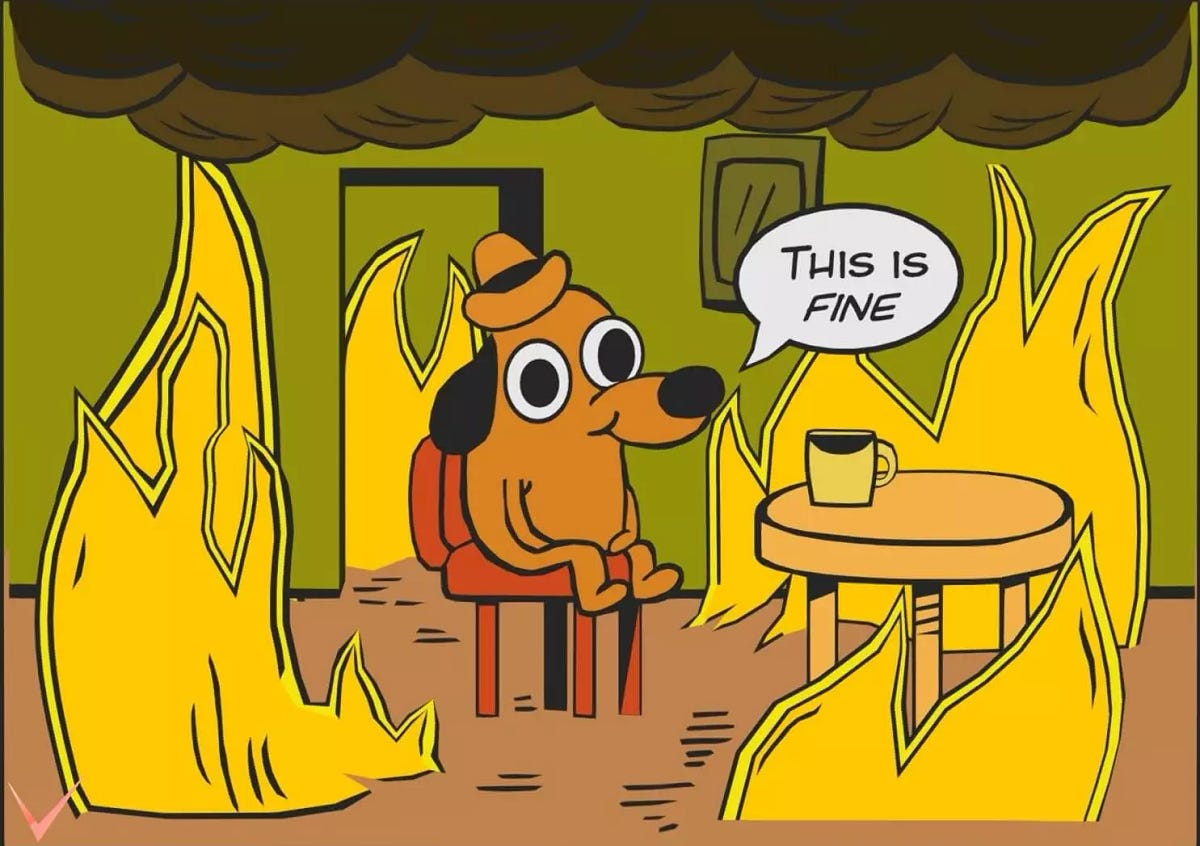

La mejor estrategia depende de las características específicas de tus datos y del contexto de tu análisis

**¿Como decido que hago con los valores faltantes?**

- Entender que no hay una manera _perfecta_ de manejar los valores faltantes. --> Antes de decidir cómo manejar los valores faltantes, es fundamental comprender la naturaleza de los datos. Esto incluye entender qué tipo de datos estamos tratando (numéricos, categóricos, etc.) y por qué podrían estar faltando los valores

- Depende de mis datos

- Observar no solo la cantidad de datos faltantes sino también su patrón. --> No solo la cantidad de valores faltantes es importante, sino también su distribución en el conjunto de datos. Identificar patrones en los valores faltantes puede proporcionar pistas sobre por qué faltan y cómo deberían ser manejados

- Estrategias:  
     - **Eliminar los valores**:
        - Si la recogida de datos no se ha realizado de forma aleatoria introduce sesgo.  
        - En el caso de que haya mucho patrones con datos faltantes, podría reducir considerablemente la cantidad de filas disponibles.(afecta la representabilidad)
     - **Eliminación de la variable (columna)**:
     En algunos casos, si una columna contiene una gran cantidad de valores faltantes o si la variable no es relevante para nuestro análisis, podemos optar por eliminar esa variable por completo.         
        - Las variables “descartadas” podrían contener información de vital importancia.      
     - **Imputar los valores**:
        - Sustituir por media o mediana: Solo en **variables numericas**  
        - Sustituir por valor mas frecuente: Util para **variables categoricas**
        - Algoritmo de ML: K-NN (k-nearest neighboors) Algunos algoritmos de aprendizaje automático pueden utilizarse para estimar valores faltantes basándose en datos existentes.

## Eliminar datos

A) Si optamos por eliminar los datos, puedemos hacerlo usando la siguiente función:
    
`.dropna(self, axis=0, how='any', thresh=None, subset=None, inplace=False)`

- **axis**: {0, 1}, default 0. 0: Filas, 1: Columnas
- **how**: {'any', 'all'}, default 'any'. Any: Si hay un valor faltante elimina la columna o fila. All: Si todos los valores de la fila o columna son faltantes, elimina la fila o columna.
- **subset**: Nombre de filas o columnas donde buscar valores faltantes
- **inplace**: True modifica el DataFrame original

[documentación](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.dropna.html)

In [ ]:
blackfriday.isna().sum()

User_ID                            0
Product_ID                         0
Gender                         53758
Age                            26879
Occupation                     80637
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            166986
Product_Category_3            373299
Purchase                       10752
dtype: int64

In [ ]:
blackfriday_drop = blackfriday.dropna()
#eliminar filas que contienen valores nulos (NaN)
# sin argumentos: elimina todas las filas que contienen al menos un valor nulo en cualquier columna

In [ ]:
blackfriday_drop.isna().sum()

User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category_1            0
Product_Category_2            0
Product_Category_3            0
Purchase                      0
dtype: int64

In [ ]:
blackfriday.shape

(537577, 12)

In [ ]:
blackfriday_drop.shape

(116955, 12)

In [ ]:
blackfriday.head(3)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,14.0,10.0,A,2,0,3,NaN,NaN,8370.0
1,1000001,P00248942,F,15.0,NaN,A,2,0,1,6.0,14.0,15200.0
2,1000001,P00087842,NaN,15.0,10.0,A,2,0,12,NaN,NaN,1422.0


In [ ]:
blackfriday.shape

(537577, 12)

In [ ]:
blackfriday.dropna(how='all')
# se especifica que se deben eliminar solo las filas en las que todos los valores sean nulos
# Si al menos 1 de los valores en una fila es no nulo, la fila NO se eliminará

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,14.0,10.0,A,2,0,3,NaN,NaN,8370.0
1,1000001,P00248942,F,15.0,NaN,A,2,0,1,6.0,14.0,15200.0
2,1000001,P00087842,NaN,15.0,10.0,A,2,0,12,NaN,NaN,1422.0
3,1000001,P00085442,F,15.0,10.0,A,2,0,12,14.0,NaN,1057.0
4,1000002,P00285442,M,60.0,16.0,C,4+,0,8,NaN,NaN,7969.0
...,...,...,...,...,...,...,...,...,...,...,...,...
537572,1004737,P00193542,M,43.0,16.0,C,1,0,1,2.0,NaN,11664.0
537573,1004737,P00111142,M,37.0,16.0,C,1,0,1,15.0,16.0,19196.0
537574,1004737,P00345942,M,41.0,16.0,C,1,0,8,15.0,NaN,8043.0
537575,1004737,P00285842,M,38.0,16.0,C,1,0,5,NaN,NaN,7172.0


In [ ]:
blackfriday.shape

(537577, 12)

In [ ]:
blackfriday.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 537577 entries, 0 to 537576
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     537577 non-null  int64  
 1   Product_ID                  537577 non-null  object 
 2   Gender                      483819 non-null  object 
 3   Age                         510698 non-null  float64
 4   Occupation                  456940 non-null  float64
 5   City_Category               537577 non-null  object 
 6   Stay_In_Current_City_Years  537577 non-null  object 
 7   Marital_Status              537577 non-null  int64  
 8   Product_Category_1          537577 non-null  int64  
 9   Product_Category_2          370591 non-null  float64
 10  Product_Category_3          164278 non-null  float64
 11  Purchase                    526825 non-null  float64
dtypes: float64(5), int64(3), object(4)
memory usage: 49.2+ MB


In [ ]:
blackfriday.dropna(subset=['Gender'])
#se deben considerar solo las filas donde el valor en la columna 'Gender' es nulo

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,14.0,10.0,A,2,0,3,NaN,NaN,8370.0
1,1000001,P00248942,F,15.0,NaN,A,2,0,1,6.0,14.0,15200.0
3,1000001,P00085442,F,15.0,10.0,A,2,0,12,14.0,NaN,1057.0
4,1000002,P00285442,M,60.0,16.0,C,4+,0,8,NaN,NaN,7969.0
5,1000003,P00193542,M,28.0,15.0,A,3,0,1,2.0,NaN,15227.0
...,...,...,...,...,...,...,...,...,...,...,...,...
537572,1004737,P00193542,M,43.0,16.0,C,1,0,1,2.0,NaN,11664.0
537573,1004737,P00111142,M,37.0,16.0,C,1,0,1,15.0,16.0,19196.0
537574,1004737,P00345942,M,41.0,16.0,C,1,0,8,15.0,NaN,8043.0
537575,1004737,P00285842,M,38.0,16.0,C,1,0,5,NaN,NaN,7172.0


In [ ]:
blackfriday.dropna(subset=['Age', 'Gender'])

## Imputar datos

B) Si optamos por imputar los datos, podemos hacerlo usando la siguiente función:
    
`sklearn.impute.SimpleImputer(missing_values=nan, strategy=’mean’, fill_value=None, copy=True, add_indicator=False)`
    
- **missing_values**: Indica como son representados los valores faltantes (np.nan es el estandard)
- **strategy**: `mean`, `median`, `most_frequent`, `constant`.
- **fill_value**: Si uso `constant`, puedo usar `fill_value` para indicar por cuál valor debe ser reemplazado
- **copy**: Si pongo True, crea una copia de X
- **add_indicator**: Agrega un indicador para los valores faltantes.


[documentación](https://scikit-learn.org/stable/modules/generated/sklearn.impute.SimpleImputer.html#sklearn.impute.SimpleImputer)

In [ ]:
from sklearn.impute import SimpleImputer

**SimpleImputer** es una herramienta útil para manejar datos faltantes en conjuntos de datos. Permite imputar valores faltantes utilizando estrategias simples, como la imputación de la media, mediana, moda o un valor constant

**Variable: `City_Category`**

In [ ]:
blackfriday.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 537577 entries, 0 to 537576
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     537577 non-null  int64  
 1   Product_ID                  537577 non-null  object 
 2   Gender                      483819 non-null  object 
 3   Age                         510698 non-null  float64
 4   Occupation                  456940 non-null  float64
 5   City_Category               537577 non-null  object 
 6   Stay_In_Current_City_Years  537577 non-null  object 
 7   Marital_Status              537577 non-null  int64  
 8   Product_Category_1          537577 non-null  int64  
 9   Product_Category_2          370591 non-null  float64
 10  Product_Category_3          164278 non-null  float64
 11  Purchase                    526825 non-null  float64
dtypes: float64(5), int64(3), object(4)
memory usage: 49.2+ MB


In [ ]:
blackfriday.head(3)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,14.0,10.0,A,2,0,3,NaN,NaN,8370.0
1,1000001,P00248942,F,15.0,NaN,A,2,0,1,6.0,14.0,15200.0
2,1000001,P00087842,NaN,15.0,10.0,A,2,0,12,NaN,NaN,1422.0


<ipython-input-57-8157948e55bb>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Occupation", data=blackfriday, palette="Set3")


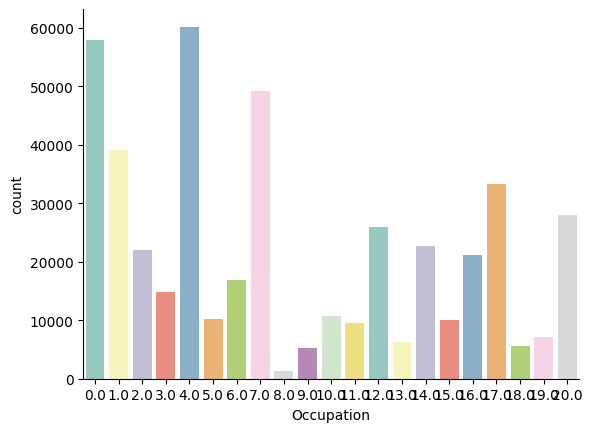

In [ ]:
sns.countplot(x="Occupation", data=blackfriday, palette="Set3")
sns.despine()
# que tipo de grafico es?
# que tipo de variable usamos?
# que hace "despine"?

In [ ]:
blackfriday['Occupation'].value_counts()

Occupation
4.0     60180
0.0     57924
7.0     49151
1.0     39031
17.0    33285
20.0    27948
12.0    25958
14.0    22702
2.0     21927
16.0    21166
6.0     16884
3.0     14839
10.0    10734
5.0     10129
15.0     9984
11.0     9610
19.0     7061
13.0     6357
18.0     5541
9.0      5218
8.0      1311
Name: count, dtype: int64

In [ ]:
imputer = SimpleImputer(missing_values=np.nan, strategy="most_frequent")
# que creen que hace esta linea?

In [ ]:
blackfriday_imputados = imputer.fit_transform(blackfriday[['Occupation']])

Se usa el método **fit_transform** del objeto SimpleImputer para ajustar y transformar los datos. Se pasa la columna "Occupation" de "blackfriday" como entrada. El método fit_transform ajustará el imputador utilizando la estrategia definida previamente ("most_frequent") y luego imputará los valores faltantes en la columna "Occupation".




IMPUTADOR: generalmente se refiere a una instancia de una clase diseñada específicamente para manejar valores faltantes y realizar la imputación, es decir, completar o reemplazar los valores faltantes con valores estimados

In [ ]:
np.shape(blackfriday_imputados)

(537577, 1)

In [ ]:
print(blackfriday_imputados)

[[10.]
 [ 4.]
 [10.]
 ...
 [16.]
 [16.]
 [16.]]


In [ ]:
blackfriday_imputados[:3] # COLUMNAS - FILAS - ojo!!

array([[10.],
       [ 4.],
       [10.]])

In [ ]:
blackfriday["Occupation"] = blackfriday_imputados

In [ ]:
blackfriday.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,14.0,10.0,A,2,0,3,NaN,NaN,8370.0
1,1000001,P00248942,F,15.0,4.0,A,2,0,1,6.0,14.0,15200.0
2,1000001,P00087842,NaN,15.0,10.0,A,2,0,12,NaN,NaN,1422.0
3,1000001,P00085442,F,15.0,10.0,A,2,0,12,14.0,NaN,1057.0
4,1000002,P00285442,M,60.0,16.0,C,4+,0,8,NaN,NaN,7969.0


In [ ]:
blackfriday['Occupation'].value_counts()

Occupation
4.0     140817
0.0      57924
7.0      49151
1.0      39031
17.0     33285
20.0     27948
12.0     25958
14.0     22702
2.0      21927
16.0     21166
6.0      16884
3.0      14839
10.0     10734
5.0      10129
15.0      9984
11.0      9610
19.0      7061
13.0      6357
18.0      5541
9.0       5218
8.0       1311
Name: count, dtype: int64

**Variable: `Age`**

In [ ]:
blackfriday['Age'].describe()

count    510698.000000
mean         34.321239
std          11.640546
min          14.000000
25%          26.000000
50%          32.000000
75%          42.000000
max          74.000000
Name: Age, dtype: float64

In [ ]:
imputer_age = SimpleImputer(missing_values=np.nan, strategy="mean")

In [ ]:
blackfriday["Age"] = imputer_age.fit_transform(blackfriday[['Age']])

In [ ]:
blackfriday['Age'].describe()

**Variable: `Gender`**

In [ ]:
blackfriday['Gender'].value_counts()

In [ ]:
imputer_gen = SimpleImputer(missing_values=np.nan, strategy="most_frequent")

In [ ]:
blackfriday['Gender'] = imputer_gen.fit_transform(blackfriday[['Gender']])

In [ ]:
blackfriday['Gender'].value_counts()

**Variable `Purchase`**

In [ ]:
blackfriday.dropna(subset=['Purchase'], inplace=True)

**Columnas `Product_Category_2` and `Product_Category_3`**

In [ ]:
blackfriday

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,14.0,10.0,A,2,0,3,NaN,NaN,8370.0
1,1000001,P00248942,F,15.0,4.0,A,2,0,1,6.0,14.0,15200.0
2,1000001,P00087842,NaN,15.0,10.0,A,2,0,12,NaN,NaN,1422.0
3,1000001,P00085442,F,15.0,10.0,A,2,0,12,14.0,NaN,1057.0
4,1000002,P00285442,M,60.0,16.0,C,4+,0,8,NaN,NaN,7969.0
...,...,...,...,...,...,...,...,...,...,...,...,...
537572,1004737,P00193542,M,43.0,16.0,C,1,0,1,2.0,NaN,11664.0
537573,1004737,P00111142,M,37.0,16.0,C,1,0,1,15.0,16.0,19196.0
537574,1004737,P00345942,M,41.0,16.0,C,1,0,8,15.0,NaN,8043.0
537575,1004737,P00285842,M,38.0,16.0,C,1,0,5,NaN,NaN,7172.0


In [ ]:
blackfriday.drop(['Product_Category_2', 'Product_Category_3'], axis=1, inplace=True)# prueben!!

In [ ]:
blackfriday.isna().sum()

#### DETECCION DE OUTLIERS

SIEMPRE: visualizacion

In [ ]:
#  valores normales
datos_normales = np.random.normal(loc=50, scale=10, size=100)
#  valores atípicos
outliers = np.random.normal(loc=120, scale=20, size=10)
# combinar
datos = np.concatenate([datos_normales, outliers])
# mezclar
np.random.shuffle(datos)

In [ ]:
datos = [48.9948991, 37.3813284, 56.36816984, 44.14007015, 44.46743138,
         59.066654, 60.64656693, 52.96440098, 58.02953275, 36.6525765,
         49.66328019, 54.21995336, 53.12252751, 47.0567411, 55.47386636,
         62.14559181, 56.14457935, 51.80022267, 47.95322382, 38.20117591,
         166.33021255, 168.26342977, 175.20109735, 172.59467969, 158.72705968]


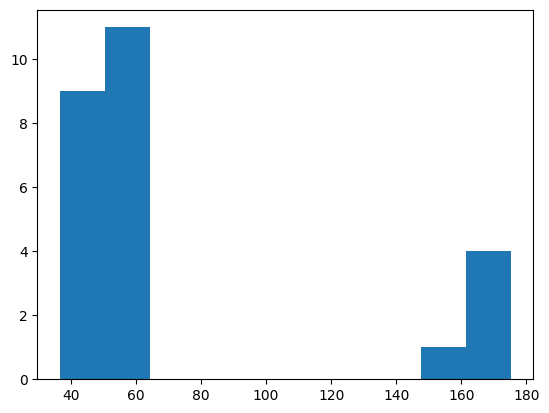

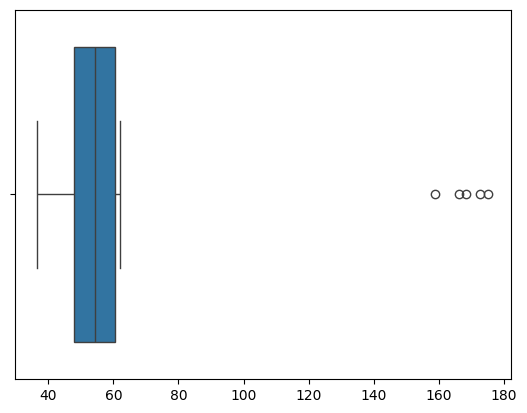

ValueError: x and y must be the same size

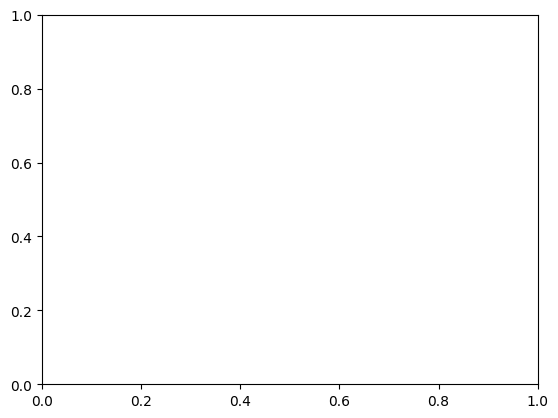

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histograma
plt.hist(datos)
plt.show()

# Diagrama de caja
sns.boxplot(x=datos)
plt.show()

# Gráfico de dispersión
plt.scatter(x=datos.index, y=datos)
plt.show()



In [ ]:
# estadisticas descriptivas
mean = datos.mean()
median = datos.median()
std_dev = datos.std()
quartiles = datos.quantile([0.25, 0.75])


- Manera de detectar outliers:
    - z-score
        - Considera que todo valor que se aleje mucho de la media=0 es un outlier.
        - Depende de la media y el desvio estandard para medir la centralidad y dispersión, los cuales son muy afectados por outliers. Si las variables no tiene una distribución normal, termino removiendo muchos outliers del dataset.
        - No funciona bien en dataset muy pequeños.
    - Rango Intercuartil:
        - Es robusto y no es tan sensible a outliers.

El z-score es una **medida estadística** que indica cuántas desviaciones estándar un valor está por encima o por debajo de la media de una distribución.

Por ejemplo, si un valor tiene un z-score de 3, significa que está tres desviaciones estándar por encima de la media. La regla general es que cualquier valor con un z-score por encima de 3 o por debajo de -3 se considera un outlier. Sin embargo, esto puede variar según el contexto del problema.

Por ejemplo, supongamos que estamos analizando las alturas de los estudiantes de una escuela. Si la media de altura es 160 cm y la desviación estándar es 10 cm, un estudiante con una altura de 190 cm tendría un z-score de 3, lo que indicaría que es un outlier en términos de altura.

Sin embargo, el z-score depende de que los datos tengan una **distribución normal**. Si los datos no siguen una distribución normal, el z-score puede no ser efectivo para detectar outliers y puede eliminar valores válidos.

---

Otra técnica común para detectar outliers es el rango intercuartil (**IQR**, por sus siglas en inglés). El IQR se calcula como la diferencia entre el tercer cuartil (Q3) y el primer cuartil (Q1) de los datos. Los outliers se identifican como aquellos valores que caen por debajo de Q1 - 1.5 * IQR o por encima de Q3 + 1.5 * IQR.

Por ejemplo, si tenemos un conjunto de datos de ingresos familiares y calculamos el IQR, podemos identificar aquellos ingresos que están significativamente por encima o por debajo del rango intercuartil como posibles outliers.

La ventaja del rango intercuartil es que es robusto y menos sensible a outliers extremos en comparación con el z-score. Esto significa que es menos probable que identifique valores válidos como outliers y, por lo tanto, es una opción más segura cuando se trabaja con datos que **no siguen una distribución normal.**


OTROS METODOS DE DETECCIÓN (NO ABARCADOS AQUI):
Método de Dixon Q: Este método calcula el valor Q de Dixon para identificar outliers en un conjunto de datos. El valor Q se calcula como la diferencia entre el valor más extremo y el valor más cercano a él, dividida por el rango de los datos. Se utiliza principalmente cuando se desea identificar un solo outlier en un conjunto de datos pequeño.

Distancia Mahalanobis: Esta medida de distancia se utiliza para calcular la distancia entre un punto de datos y un conjunto de datos multivariante, teniendo en cuenta la covarianza entre las variables. Es útil cuando se trabaja con conjuntos de datos multidimensionales y se necesita considerar la correlación entre las variables.

Análisis de valores atípicos extremos (EOA): Este método utiliza la distancia de Mahalanobis para identificar valores atípicos en conjuntos de datos multivariados. Se basa en el principio de que los valores atípicos extremos pueden ser detectados al examinar la distancia de Mahalanobis entre los puntos de datos.

Método basado en densidad: Estos métodos utilizan técnicas de estimación de densidad para identificar regiones de baja densidad en el espacio de características, lo que sugiere la presencia de outliers. Ejemplos incluyen el método de k-nearest neighbors (KNN) y el método de detección de outliers localmente adaptativo (LOF).

Métodos basados en modelos: Estos métodos utilizan modelos estadísticos o de aprendizaje automático para identificar outliers. Por ejemplo, los métodos basados en regresión pueden identificar puntos de datos que tienen residuos inusualmente grandes, mientras que los métodos basados en clustering pueden identificar puntos de datos que no se agrupan bien con otros.

In [ ]:
from scipy.stats import zscore

z_scores = zscore(data)
# Esta función calcula los z-scores de un conjunto de datos,
# indica cuántas desviaciones estándar un valor está por encima o por debajo
# de la media del conjunto de datos
outliers = data[abs(z_scores) > 3]


TypeError: can only concatenate str (not "float") to str

In [ ]:
Q1 = datos.quantile(0.25)
Q3 = datos.quantile(0.75)
IQR = Q3 - Q1
outliers = datos[(datos < Q1 - 1.5 * IQR) | (datos > Q3 + 1.5 * IQR)]


In [ ]:
blackfriday.dtypes

User_ID                         int64
Product_ID                     object
Gender                         object
Age                           float64
Occupation                    float64
City_Category                  object
Stay_In_Current_City_Years     object
Marital_Status                  int64
Product_Category_1              int64
Product_Category_2            float64
Product_Category_3            float64
Purchase                      float64
dtype: object

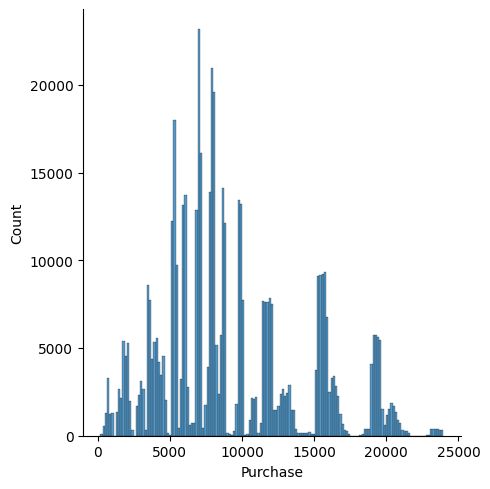

In [ ]:
sns.displot(blackfriday['Purchase'])
sns.despine()

In [ ]:
sns.barplot(blackfriday['Purchase'], color='#F5B041')
sns.despine()

In [ ]:
z = stats.zscore(np.array(blackfriday['Purchase']))

In [ ]:
threshold = 2.5

In [ ]:
z_index = blackfriday['Purchase'][np.abs(z) < threshold].index

blackfriday_withzscore = blackfriday.loc[z_index]

In [ ]:
sns.barplot(blackfriday_withzscore['Purchase'], color='#F5B041')
sns.despine()

In [ ]:
sns.boxplot(blackfriday['Purchase'])
sns.despine()

In [ ]:
q1 = blackfriday['Purchase'].quantile(0.25)
q3 = blackfriday['Purchase'].quantile(0.75)

In [ ]:
iqr = q3 - q1
lb = q1 - (iqr * 1.5)
ub = q3 + (iqr * 1.5)

In [ ]:
blackfriday = blackfriday[(blackfriday['Purchase'] > lb) & (blackfriday['Purchase'] < ub)]

In [ ]:
blackfriday.reset_index(drop=True, inplace=True)

In [ ]:
sns.boxplot(blackfriday['Purchase'])
sns.despine()

## BONUS

<Axes: >

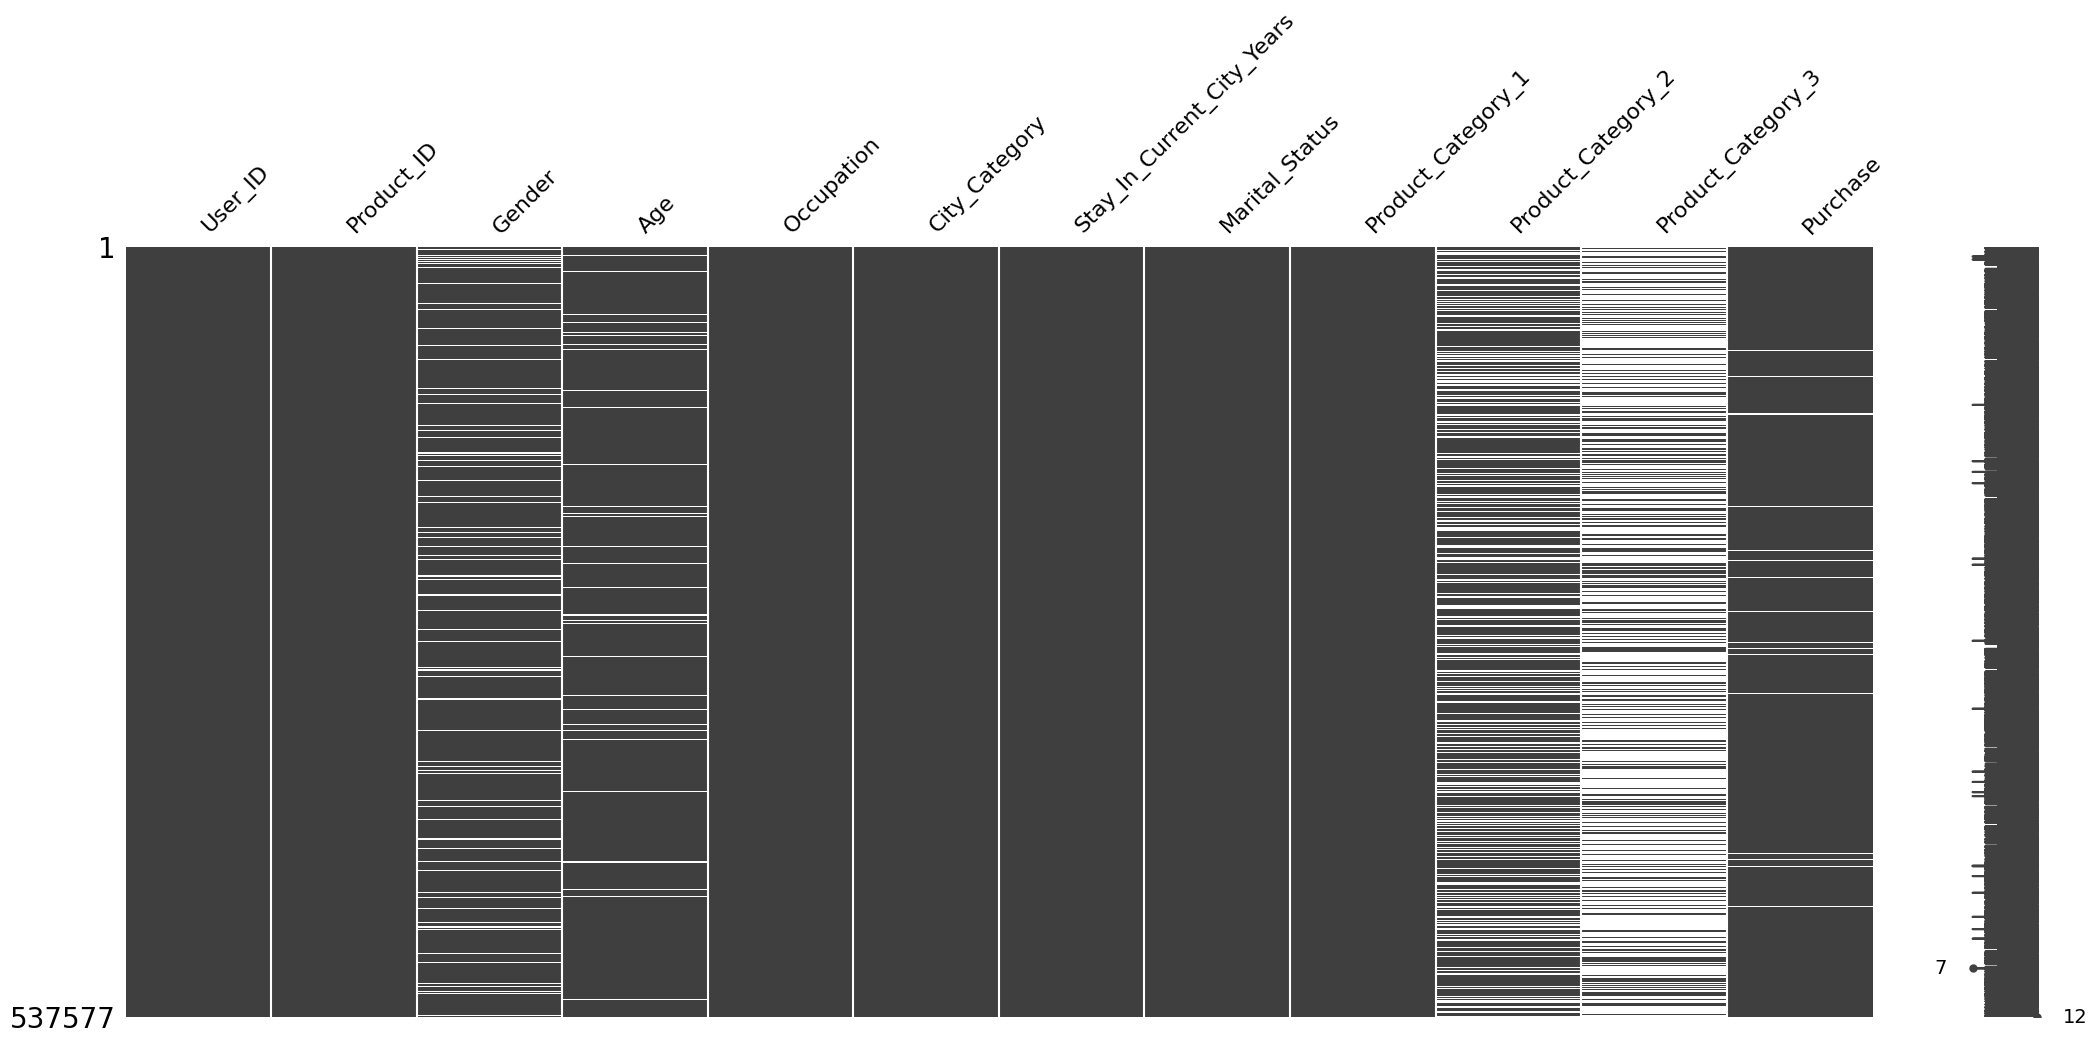

In [ ]:
import missingno as msno
import pandas as pd

# Visualizar la matriz de nulos
msno.matrix(blackfriday)

# msno.bar(df)

Una distribución normal, también conocida como distribución gaussiana o campana de Gauss, es un tipo de distribución estadística que tiene varias características distintivas:

- Forma simétrica: La distribución normal tiene una forma de campana simétrica, lo que significa que los valores se distribuyen de manera uniforme alrededor de su media.

- Media, mediana y moda son iguales: En una distribución normal, la media, la mediana y la moda coinciden y se encuentran en el centro de la campana.

- 68-95-99.7 Regla: La gran mayoría de los datos (aproximadamente el 68%) se encuentran dentro de una desviación estándar de la media, alrededor del 95% dentro de dos desviaciones estándar y casi todos (99.7%) dentro de tres desviaciones estándar.

- Curva acotada: La curva de una distribución normal nunca toca el eje x, sino que se acerca continuamente a él sin nunca cruzarlo, lo que significa que la probabilidad de que un valor se aleje demasiado de la media es extremadamente baja pero nunca llega a ser cero.

- Parámetros: Una distribución normal está completamente determinada por dos parámetros: la media (μ) y la desviación estándar (σ). La media determina la ubicación central de la distribución y la desviación estándar determina su dispersión.

- Teorema del límite central: El teorema del límite central establece que, dado un tamaño de muestra lo suficientemente grande, la distribución de la media de las muestras se aproxima a una distribución normal, independientemente de la forma de la distribución de la población original.